In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

sys.path.insert(0, "../")

import warnings
warnings.filterwarnings('ignore')

from michael import janet

2022-10-07 17:20:15.203730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
index = 50

In [4]:
j = janet.boot(uni, index=index, use_prior=False)
j.prepare_data()

Already have data downloaded for Gaia ID 2200113593132819200.
If you want to check for new data, run `janet.update()`.
Removing 3 bad data points (out of 1121) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves. Weighting=median
Removing 4 bad data points (out of 1130) using the TESS provided QUALITY array
Summing over 3 x 3 pixel lightcurves. Weighting=median
Removing 2 bad data points (out of 1226) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median


Running pixels in aperture: 100%|████████████| 300/300 [00:01<00:00, 231.76it/s]


In [5]:
j.get_rotation(period_range=(1, 10))

### Running Simple Astropy Lomb-Scargle on Sector 16-17 on star 2200113593132819200 ###
### Completed Simple Astropy Lomb-Scargle for Sector 16-17 on star 2200113593132819200 ###
### Running Wavelet Estimation for Sector 16-17 on star 2200113593132819200 ###


100%|█████████████████████████████████████████| 152/152 [00:02<00:00, 55.97it/s]


### Completed Wavelet Estimation for Sector 16-17 on star 2200113593132819200 ###
### Running Composite ACF estimation for Sector 16-17 on star 2200113593132819200 ###
### Completed Composite ACF estimation for Sector 16-17 on star 2200113593132819200 ###
### Running ACF Estimation on star 2200113593132819200 ###
### Completed ACF Estimation for Sector 16-17 on star 2200113593132819200 ###
### Running Simple Astropy Lomb-Scargle on Sector 24 on star 2200113593132819200 ###
### Completed Simple Astropy Lomb-Scargle for Sector 24 on star 2200113593132819200 ###
### Running Wavelet Estimation for Sector 24 on star 2200113593132819200 ###


100%|███████████████████████████████████████████| 79/79 [00:00<00:00, 90.17it/s]

### Completed Wavelet Estimation for Sector 24 on star 2200113593132819200 ###
### Running Composite ACF estimation for Sector 24 on star 2200113593132819200 ###
### Completed Composite ACF estimation for Sector 24 on star 2200113593132819200 ###
### Running ACF Estimation on star 2200113593132819200 ###
### Completed ACF Estimation for Sector 24 on star 2200113593132819200 ###


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


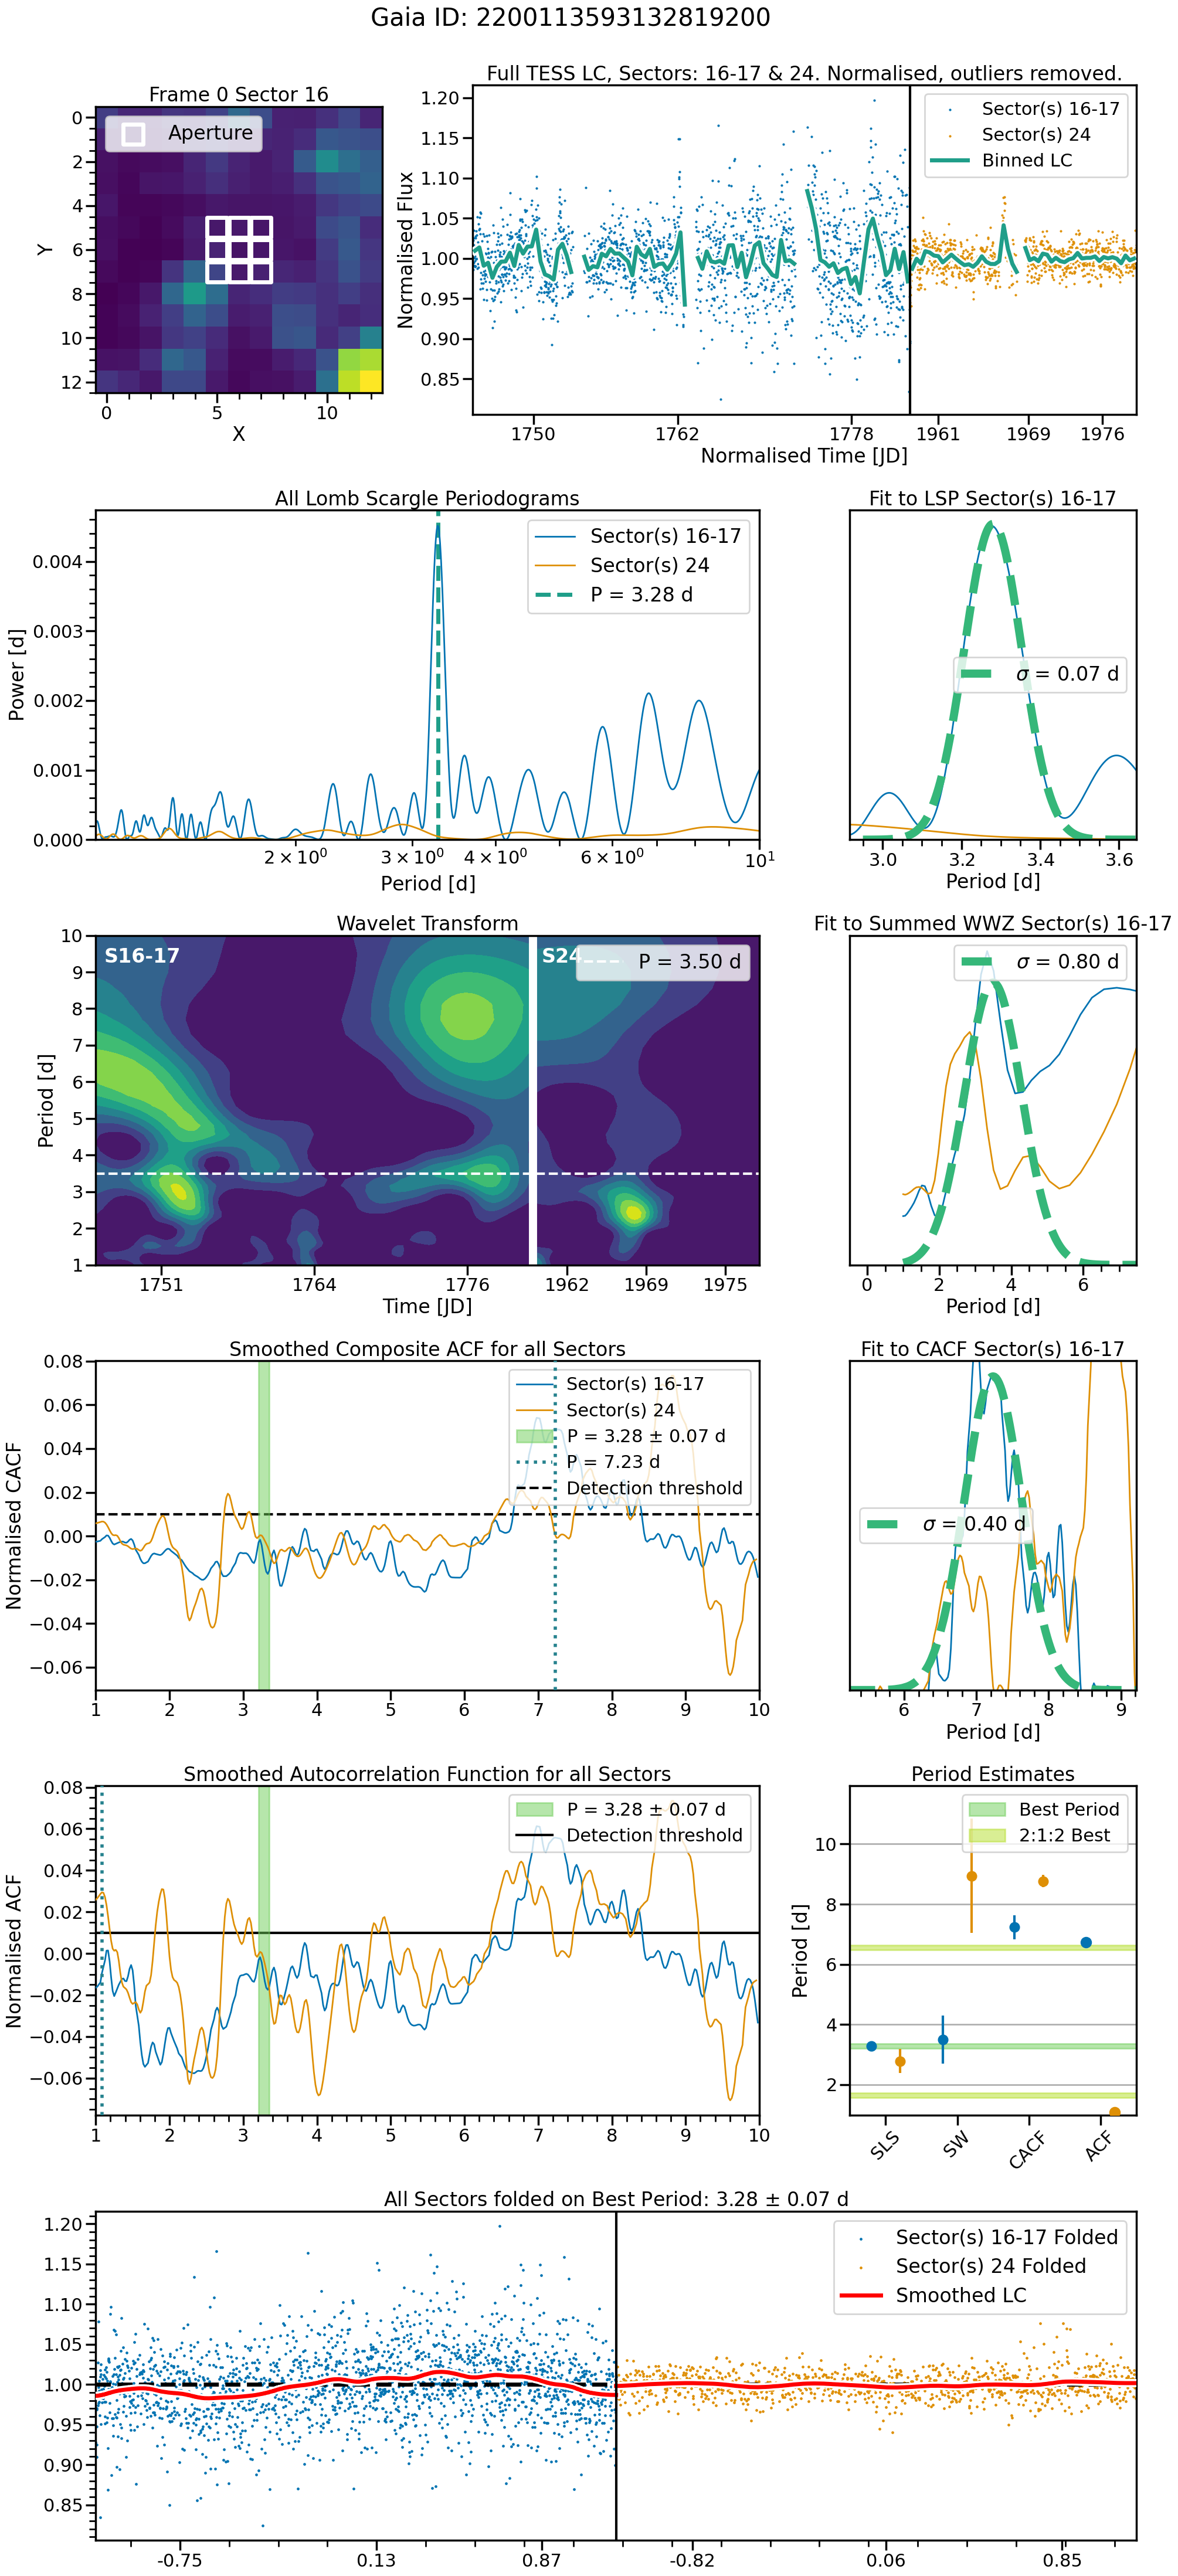

In [6]:
j.validate_rotation()
j.view()

In [7]:
f = j.void['clc_16-17'].fold(j.results.loc['best', 'overall'])

In [8]:
from scipy.ndimage import gaussian_filter1d
# Smooth the  CACF
sd = np.sqrt(len(f))
fsmoo = gaussian_filter1d(f.flux.value, sigma = sd, mode='reflect')



In [9]:
np.diff([fsmoo.min(), fsmoo.max()])


array([0.03293672])

In [10]:
np.std(f.flux)

<Quantity 0.04393264>

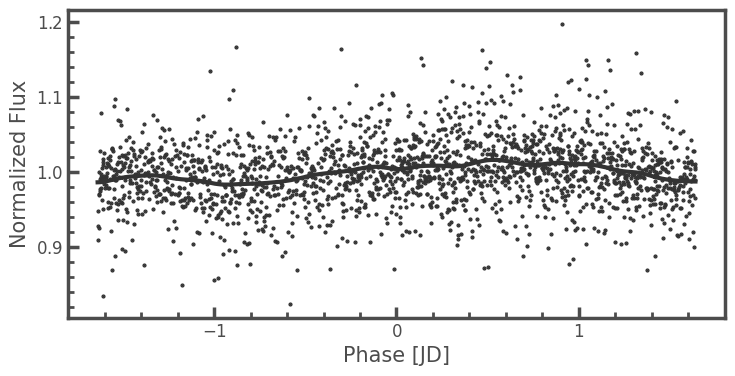

In [11]:
ax = f.scatter()
ax.plot(f.time.value, fsmoo)

Plot lightcurves

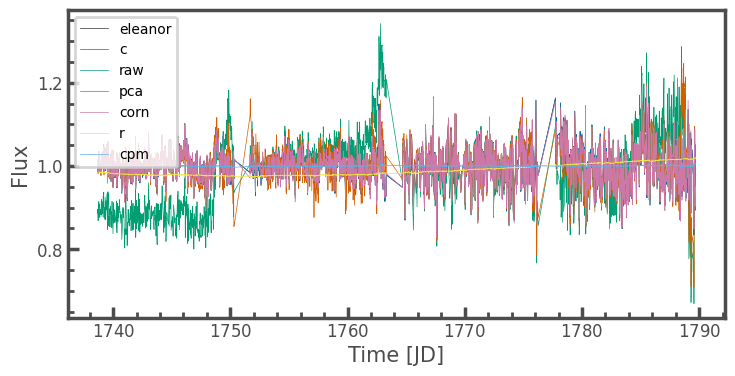

In [12]:
ax = j.void['clc_16-17'].plot(label='eleanor')

pls = ['c','raw','pca','corn','r', 'cpm']
for pl in pls:
    j.void[f'{pl}lc_16-17'].plot(ax=ax, label=pl)
ax.legend(fontsize=10)

3.292683409423734 d
27.0 d
3.292683409423734 d
3.292683409423734 d
27.0 d
24.41491599730582 d


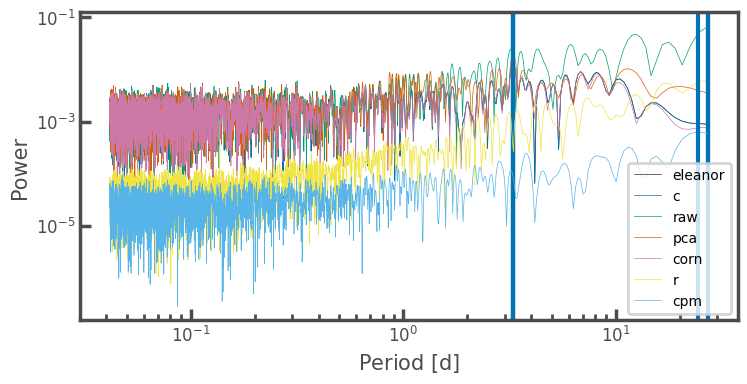

In [13]:
ax = j.void['clc_16-17'].to_periodogram(maximum_period=27).plot(label='eleanor', view='period')

pls = ['c','raw','pca','corn','r', 'cpm']
for pl in pls:
    j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).plot(ax=ax, label=pl,view='period', scale='log')
    ax.axvline(j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).period_at_max_power.value)
    print(j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).period_at_max_power)
ax.legend(fontsize=10)